In [174]:
#importing libraries
import pandas as pd
import io
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns
import random

In [175]:
pc_df=pd.read_csv(r"C:\Users\briju\Desktop\Mtech\Assignment\Data\pizza_customers.csv")

In [176]:
pc_df.shape

(200, 5)

In [177]:
pc_df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [178]:
pc_df.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [179]:
#checking null Values
pc_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [180]:
pc_df[pc_df['Gender']=='Male'].count()


CustomerID                88
Gender                    88
Age                       88
Annual Income (k$)        88
Spending Score (1-100)    88
dtype: int64

In [181]:
pc_df[pc_df['Gender']=='Female'].count()


CustomerID                112
Gender                    112
Age                       112
Annual Income (k$)        112
Spending Score (1-100)    112
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d17a41adf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d17a4264f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d17a41aa90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d17a426bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d17a426f10>],
 'means': []}

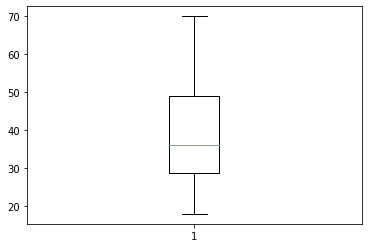

In [182]:

#checking Outliers using Box plot
plt.boxplot(pc_df['Age'], notch=None, vert=None, patch_artist=None, widths=None)


{'whiskers': [<matplotlib.lines.Line2D at 0x1d17a47e2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d17a47e970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d17a46dee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d17a488070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d17a4883d0>],
 'means': []}

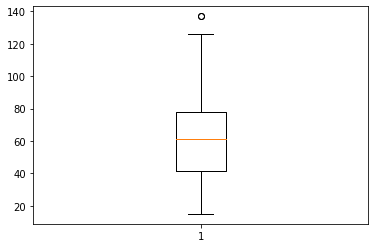

In [183]:
plt.boxplot(pc_df['Annual Income (k$)'], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d17a4d1f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d17a4e15e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d17a4d1be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d17a4e1be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d17a4e1f10>],
 'means': []}

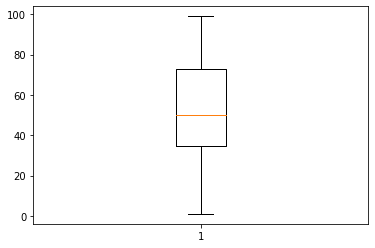

In [184]:
plt.boxplot(pc_df['Spending Score (1-100)'], notch=None, vert=None, patch_artist=None, widths=None)

C:\Users\briju\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



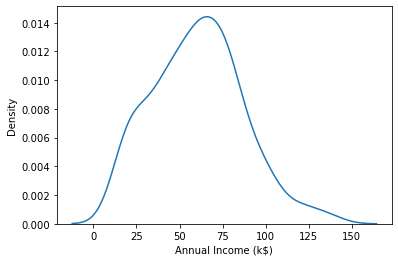

In [185]:
import seaborn as sns

sns.distplot(pc_df['Annual Income (k$)'], hist=False)

plt.show()

In [186]:
pc_df[pc_df['Annual Income (k$)']>100]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
186,187,Female,54,101,24
187,188,Male,28,101,68
188,189,Female,41,103,17
189,190,Female,36,103,85
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


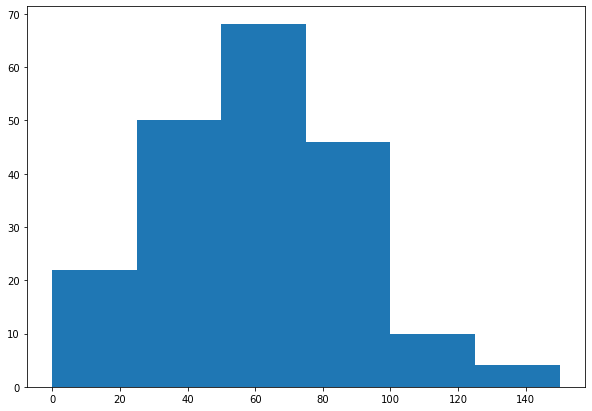

In [187]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(pc_df['Annual Income (k$)'], bins = [0, 25, 50, 75, 100,125,150])
 
# Show plot
plt.show()

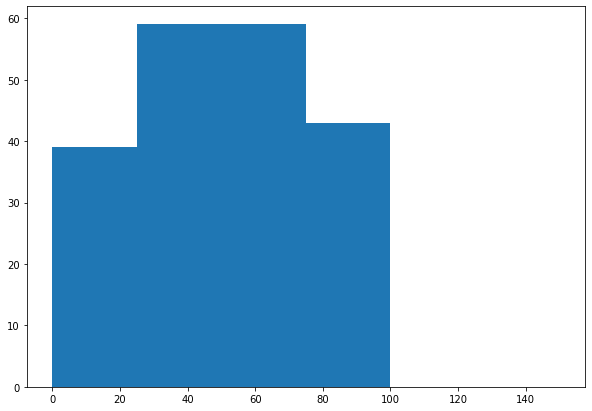

In [188]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(pc_df['Spending Score (1-100)'], bins = [0, 25, 50, 75, 100,125,150])
 
# Show plot
plt.show()

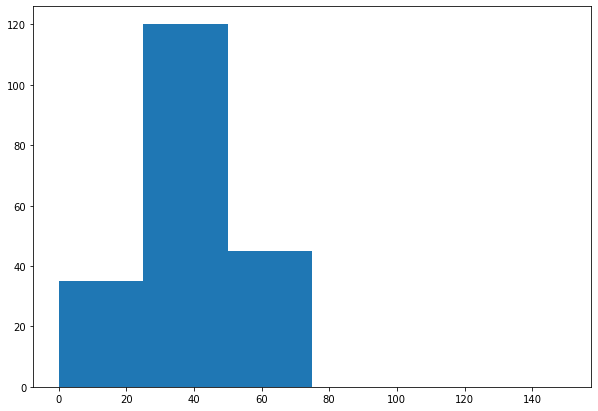

In [189]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(pc_df['Age'], bins = [0, 25, 50, 75, 100,125,150])
 
# Show plot
plt.show()

In [190]:
#already we gave a 200 records and outliers will impact K-mean 
#so instead of removing them we will winsorizing the data

C:\Users\briju\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Annual Income (k$)'>

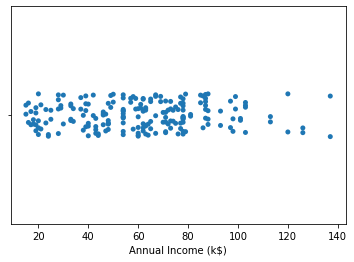

In [191]:
sns.stripplot(pc_df['Annual Income (k$)'])

In [192]:

WinsorizedArray = winsorize(pc_df['Annual Income (k$)'],(0,0.03))

In [193]:
pc_df['Annual Income (k$)']=WinsorizedArray

In [194]:
pc_df['Annual Income (k$)']

0       15
1       15
2       16
3       16
4       17
      ... 
195    113
196    113
197    113
198    113
199    113
Name: Annual Income (k$), Length: 200, dtype: int64

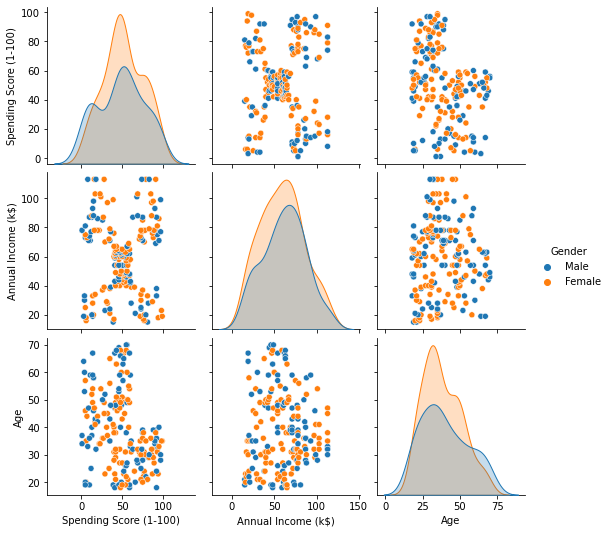

In [195]:
sns.pairplot(pc_df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

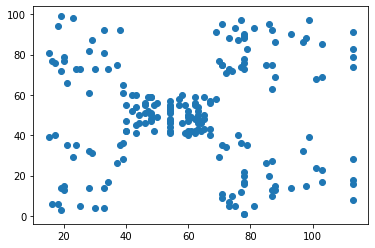

In [196]:
x=pc_df['Annual Income (k$)']
y=pc_df['Spending Score (1-100)']
plt.scatter(x, y)
plt.show()

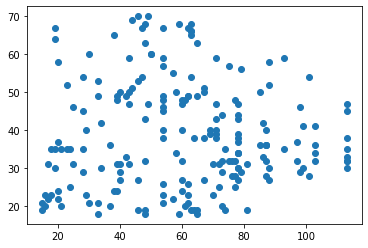

In [197]:
x=pc_df['Annual Income (k$)']
y=pc_df['Age']
plt.scatter(x, y)
plt.show()

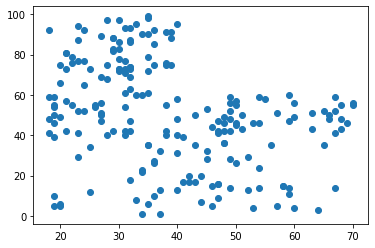

In [198]:
x=pc_df['Age']
y=pc_df['Spending Score (1-100)']
plt.scatter(x, y)
plt.show()

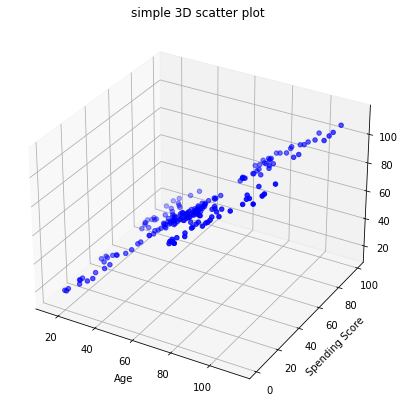

In [199]:
x=pc_df['Age']
y=pc_df['Spending Score (1-100)']
z=x=pc_df['Annual Income (k$)']
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "blue")
plt.title("simple 3D scatter plot")
plt.xlabel("Age")
plt.ylabel("Spending Score") 
#plt.zlabel("Annual income") 
# show plot
plt.show()

In [200]:
pc_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,113,79
196,197,Female,45,113,28
197,198,Male,32,113,74
198,199,Male,32,113,18


In [201]:
####Kmeans Clustering##############


In [202]:
def mindistance(centroids,vp):
    maxi=0
    for i  in range(len(centroids)):
       
        p1 = centroids[i]
        p2 = vp
        #print(p2)
        squared_dist = np.sum((p1-p2)**2, axis=0)
        dist = np.sqrt(squared_dist)
        #print(dist)
        if i==0:
            maxi=dist
            maxi_i=0
        elif(maxi>dist):
            maxi=dist
            maxi_i=i
            
    return maxi_i
            
            

In [203]:
def updating_cluster(i,j,pc1_df):
    if i==0:
        pc1_df.at[j,'cluster']="C1"
    elif i==1:
        pc1_df.at[j,'cluster']="C2"
    elif i==2:
        pc1_df.at[j,'cluster']="C3"
    elif i==3:
        pc1_df.at[j,'cluster']="C4"
    elif i==4:
        pc1_df.at[j,'cluster']="C5"
        

In [204]:
def updating_Centroid(pc1_df,s_pc1_df):
    centroids[0]=calculating_mean("C1")
    #print(centroids[0])
    centroids[1]=calculating_mean("C2")
    centroids[2]=calculating_mean("C3")
    centroids[3]=calculating_mean("C4")
    centroids[4]=calculating_mean("C5")
    return centroids
    

In [205]:
def calculating_mean(clustarname):
    new_arr=[]
    for i in range(pc1_df.shape[0]):
        
        if pc1_df['cluster'][i]==clustarname:
            new_arr.append(s_pc1_df[i])
        a=np.array(new_arr)
        #rint(np.mean(a,axis=0))
        
            
    return np.mean(a,axis=0)

In [206]:
def creating_initial_centroids(s_pc1_df):
    centroids=[]
    K=5
    #centroids=np.array([]).reshape(n,0)
    for k in range(K):
   
        centroids.append(s_pc1_df[random.randint(0,199)])
    return centroids

In [207]:
def generate_cluster_data(pc_df,pc1_df):
    cluster_df=pd.merge(pc_df, pc1_df, how='inner')
    cluster_df.to_csv('cluster_df.csv')

In [208]:
def customer_data(pc_df):
    customer_data=pc_df.drop(columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
    mobile_no=[]
    for i in range(200):
        n = 10
        m=''.join(["{}".format(random.randint(0, 9)) for num in range(0, n)])
        mobile_no.append(int(m))
    customer_data['Mobile_no']=mobile_no
    customer_data.to_csv('customer_data.csv')

In [209]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#pc_df=pd.read_csv(r"C:\Users\briju\Desktop\Mtech\Assignment\Data\pizza_customers.csv")
pc1_df=pc_df.drop(columns=['CustomerID','Gender'])

scaler = MinMaxScaler().fit(pc1_df)
s_pc1_df=scaler.transform(pc1_df)
centroids=creating_initial_centroids(s_pc1_df)
print("initails")
print(centroids)
pc1_df["cluster"] = ""
#using elbow method we decided optimal number of cluster will be 5
for k in range(5):
    for i in range(pc1_df.shape[0]):
        maxi_i=mindistance(centroids,s_pc1_df[i])
    
        updating_cluster(maxi_i,i,pc1_df)

    centroids=updating_Centroid(pc1_df,s_pc1_df)
    for i in range(pc1_df.shape[0]):
        maxi_i=mindistance(centroids,s_pc1_df[i])
    
        updating_cluster(maxi_i,i,pc1_df)

print("final Centroid")
final_centroid=centroids
print(centroids)
generate_cluster_data(pc_df,pc1_df)
customer_data(pc_df)
    

initails
[array([0.5       , 0.59183673, 0.06122449]), array([0.96153846, 0.48979592, 0.42857143]), array([0.01923077, 0.33673469, 0.59183673]), array([0.23076923, 0.64285714, 0.78571429]), array([0.36538462, 0.05102041, 0.12244898])]
final Centroid
[array([0.42067308, 0.70765306, 0.19260204]), array([0.73035117, 0.40062112, 0.49023957]), array([0.13817664, 0.26625094, 0.62490552]), array([0.28605769, 0.71428571, 0.82168367]), array([0.54326923, 0.11989796, 0.17704082])]


In [210]:
def predict(value):
    v=scaler.transform(value)[0]
    return mindistance(centroids,v)

In [211]:
import plotly as py
import plotly.graph_objs as go

for i in range(pc1_df.shape[0]):
    if pc1_df.at[i,'cluster']=="C1":
        pc1_df.at[i,'cluster']=0
    elif pc1_df.at[i,'cluster']=="C2":
        pc1_df.at[i,'cluster']=1
    elif pc1_df.at[i,'cluster']=="C3":
        pc1_df.at[i,'cluster']=2
    elif pc1_df.at[i,'cluster']=="C4":
        pc1_df.at[i,'cluster']=3
    elif pc1_df.at[i,'cluster']=="C5":
        pc1_df.at[i,'cluster']=4
df=pc1_df

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
     
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [212]:
#C1 is violet
#C2 is red
#C3 id orange
#C4 is Blue
#C5 is Yellow

In [213]:
pc1_df[(pc1_df['cluster']==0)].count()

Age                       40
Annual Income (k$)        40
Spending Score (1-100)    40
cluster                   40
dtype: int64

In [214]:
pc1_df[(pc1_df['cluster']==1)].count()

Age                       46
Annual Income (k$)        46
Spending Score (1-100)    46
cluster                   46
dtype: int64

In [215]:
pc1_df[(pc1_df['cluster']==2)].count()

Age                       54
Annual Income (k$)        54
Spending Score (1-100)    54
cluster                   54
dtype: int64

In [216]:
pc1_df[(pc1_df['cluster']==3)].count()

Age                       40
Annual Income (k$)        40
Spending Score (1-100)    40
cluster                   40
dtype: int64

In [217]:
pc1_df[(pc1_df['cluster']==4)].count()

Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
cluster                   20
dtype: int64

In [218]:
#for C1 we will offer Buy2 get 1 free on pizza(as most of them come here regularly)
#for C2 we wil offer 25 per discount on large pizza  (as number are very less and age and income is very high)
#for C3 we ill offer Buy 1 get Coke free on any pizza (as they have less age but high income and spending score)
#for C4 are those having less age and high spendimg score so we will offer extra cheese free on any pizza
#for c5 they are having average age average spending score but low income so we will offer 20% off on any pizza